## Dane wziąłęm z kaggle https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews/data

## Zadanie drugie (20 punktów)

In [38]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    tokens = word_tokenize(text.lower())
    

    cleaned = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:
            cleaned.append(lemmatizer.lemmatize(token))
    
    return ' '.join(cleaned)


with open('Musical_Instruments_5.json', 'r', encoding='utf-8') as file:
    processed_reviews = []
    
    for line in file:
        review = json.loads(line)
        review['reviewText'] = clean_text(review['reviewText'])
        processed_reviews.append(review)


with open('Musical_Instruments_5_cleaned.json', 'w', encoding='utf-8') as file:
    for review in processed_reviews:
        json.dump(review, file)
        file.write('\n')

print("DONE!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ZROBIONE!


## Instalacja potrzebnych bibliotek (wystarczy pobrać tylko raz)

In [40]:
import pandas as pd
import json
from langdetect import detect
from googletrans import Translator

data = []
with open('Musical_Instruments_5_cleaned.json', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)
print("Data loaded into DataFrame!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

translator = Translator()

def detect_and_translate(text):
    """Detect language and translate to English if needed"""
    if pd.isna(text) or text == '':
        return text, 'unknown'
    
    try:

        detected_lang = detect(text)
        

        if detected_lang != 'en':
            translated = translator.translate(text, dest='en')
            return translated.text, detected_lang
        else:
            return text, 'en'
    except:

        return text, 'en'

print("\nChecking language and translating reviews...")
translations = []
languages = []

for i, text in enumerate(df['reviewText']):
    translated_text, lang = detect_and_translate(text)
    translations.append(translated_text)
    languages.append(lang)
    
    if i % 100 == 0: 
        print(f"Processed {i} reviews...")

df['reviewText_english'] = translations
df['detected_language'] = languages


df = df.drop(columns=['unixReviewTime','helpful', 'reviewTime', 'summary'])


print("\n" + "="*50)
print("DATAFRAME ANALYSIS")
print("="*50)

print("\n1. Basic Info:")
print(df.info())

print("\n2. Missing values:")
print(df.isnull().sum())

print("\n3. Rating distribution:")
print(df['overall'].value_counts().sort_index())

print("\n4. Summary statistics:")
print(df.describe())

print("\n5. Sample of processed data:")
print(df[['reviewerName', 'overall', 'reviewText_english', 'detected_language']].head())


df.to_json('Musical_Instruments_5_final.json', orient='records', lines=True)
df.to_csv('Musical_Instruments_5_final.csv', index=False)
print("Saved to both json and csv")

Data loaded into DataFrame!
Shape: (10261, 9)
Columns: ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']

Checking language and translating reviews...
Processed 0 reviews...
Processed 100 reviews...
Processed 200 reviews...
Processed 300 reviews...
Processed 400 reviews...
Processed 500 reviews...
Processed 600 reviews...
Processed 700 reviews...
Processed 800 reviews...
Processed 900 reviews...
Processed 1000 reviews...
Processed 1100 reviews...
Processed 1200 reviews...
Processed 1300 reviews...
Processed 1400 reviews...
Processed 1500 reviews...
Processed 1600 reviews...
Processed 1700 reviews...
Processed 1800 reviews...
Processed 1900 reviews...
Processed 2000 reviews...
Processed 2100 reviews...
Processed 2200 reviews...
Processed 2300 reviews...
Processed 2400 reviews...
Processed 2500 reviews...
Processed 2600 reviews...
Processed 2700 reviews...
Processed 2800 reviews...
Processed 2900 reviews...
Processed 300

## Zadanie 3 C-F


TASK A: REMOVING DUPLICATE/SIMILAR REVIEWS
Original number of reviews: 10261
Processed 0 reviews for similarity...
Processed 100 reviews for similarity...
Processed 200 reviews for similarity...
Processed 300 reviews for similarity...
Processed 400 reviews for similarity...
Processed 500 reviews for similarity...
Processed 600 reviews for similarity...
Processed 700 reviews for similarity...
Processed 800 reviews for similarity...
Processed 900 reviews for similarity...
Processed 1000 reviews for similarity...
Processed 1100 reviews for similarity...
Processed 1200 reviews for similarity...
Processed 1300 reviews for similarity...
Processed 1400 reviews for similarity...
Processed 1500 reviews for similarity...
Processed 1600 reviews for similarity...
Processed 1700 reviews for similarity...
Processed 1800 reviews for similarity...
Processed 1900 reviews for similarity...
Processed 2000 reviews for similarity...
Processed 2100 reviews for similarity...
Processed 2200 reviews for simil

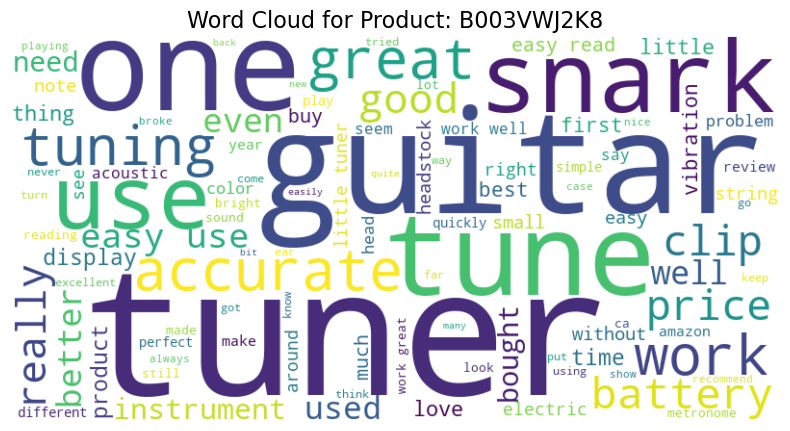


Creating word cloud for product 2/5: B0002E1G5C


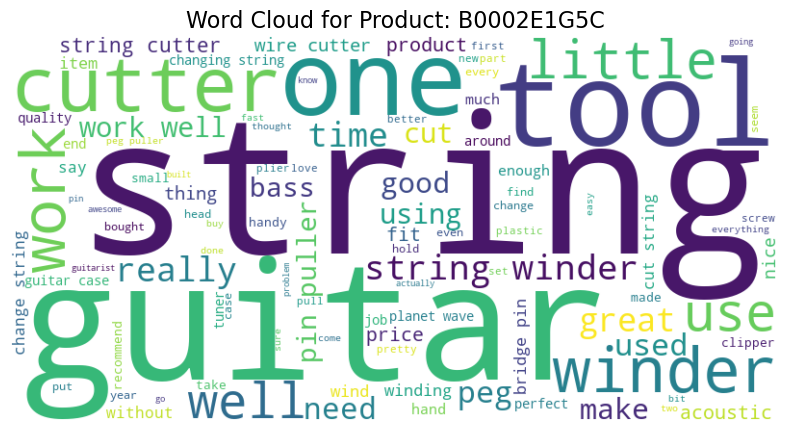


Creating word cloud for product 3/5: B0002F7K7Y


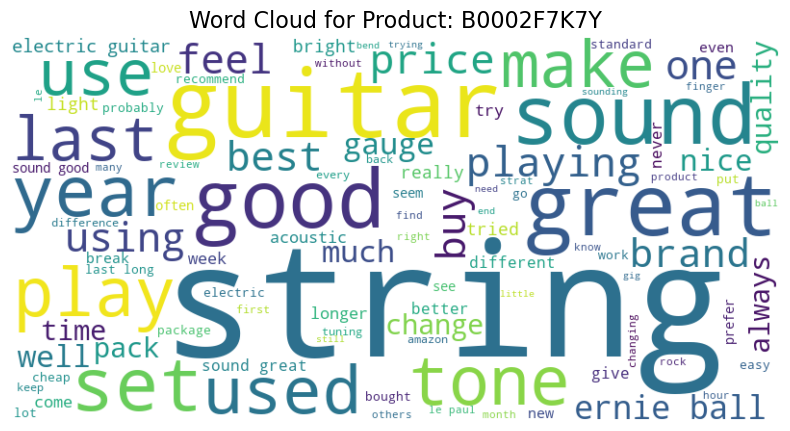


Creating word cloud for product 4/5: B003VWKPHC


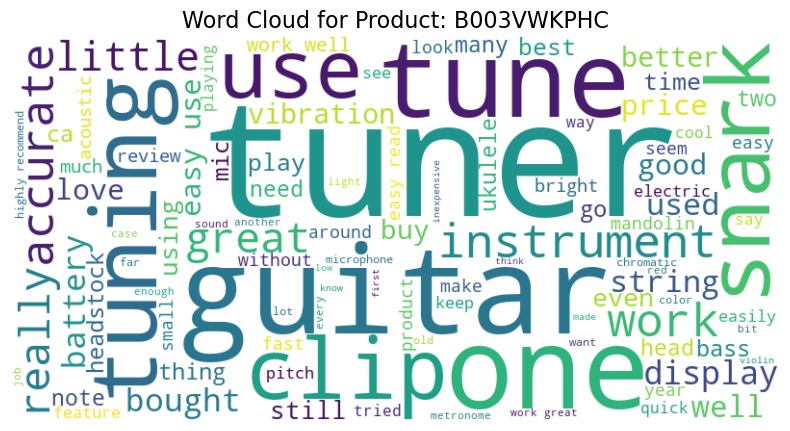


Creating word cloud for product 5/5: B0002H0A3S


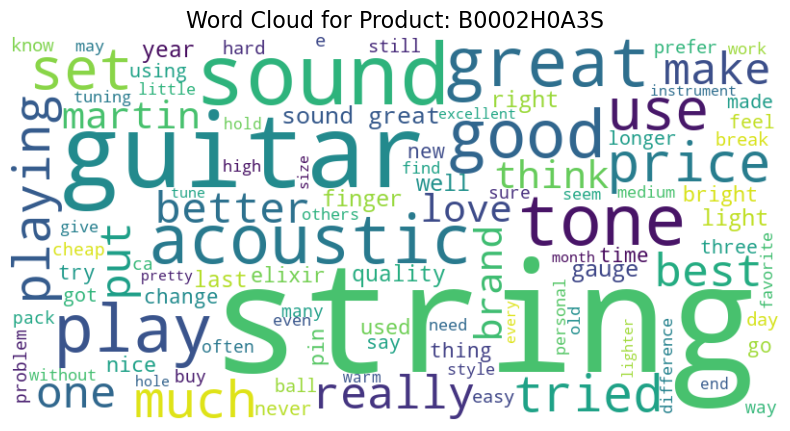


FINAL ANALYSIS SUMMARY

1. Dataset Overview:
   - Total reviews after duplicate removal: 10213
   - Total unique products: 900
   - Average reviews per product: 11.3

2. Sentiment Distribution:
   - Positive: 8261 (80.9%)
   - Neutral: 1690 (16.5%)
   - Negative: 262 (2.6%)

3. Top 5 Products by Combined Rating:
            avg_rating  combined_rating  review_count
asin                                                 
1384719342        5.00              5.0             5
B00004Y2UT        4.67              5.0             6
B000068NSX        4.57              5.0             7
B000068NTU        4.80              5.0             5
B000068NVI        4.54              5.0            13

4. Top 5 Products by Review Count:
            avg_rating  combined_rating  review_count
asin                                                 
B003VWJ2K8        4.69              5.0           162
B0002E1G5C        4.58              5.0           143
B0002F7K7Y        4.62              5.0           116
B

In [42]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np



print("\n" + "="*70)
print("TASK A: REMOVING DUPLICATE/SIMILAR REVIEWS")
print("="*70)

def remove_similar_reviews(df, similarity_threshold=0.85):
    """Remove similar reviews using cosine similarity"""
    print(f"Original number of reviews: {len(df)}")
    
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['reviewText_english'].fillna(''))
    

    cosine_sim = cosine_similarity(tfidf_matrix)
    

    to_remove = set()
    for i in range(len(cosine_sim)):
        if i in to_remove:
            continue
        for j in range(i+1, len(cosine_sim)):
            if cosine_sim[i][j] > similarity_threshold:
                to_remove.add(j) 
                
        if i % 100 == 0:
            print(f"Processed {i} reviews for similarity...")
    
    print(f"Found {len(to_remove)} similar reviews to remove")
    

    df_clean = df.drop(df.index[list(to_remove)]).reset_index(drop=True)
    print(f"Final number of reviews: {len(df_clean)}")
    
    return df_clean

df = remove_similar_reviews(df, similarity_threshold=0.85)


print("\n" + "="*70)
print("TASK B: SENTIMENT ANALYSIS")
print("="*70)

def get_sentiment(text):
    """Get sentiment polarity using TextBlob"""
    if pd.isna(text) or text == '':
        return 0, 'neutral'
    
    try:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        
        if polarity > 0.1:
            sentiment = 'positive'
        elif polarity < -0.1:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
            
        return polarity, sentiment
    except:
        return 0, 'neutral'


print("Calculating sentiment for each review...")
sentiments = []
polarities = []

for i, text in enumerate(df['reviewText_english']):
    polarity, sentiment = get_sentiment(text)
    polarities.append(polarity)
    sentiments.append(sentiment)
    
    if i % 100 == 0:
        print(f"Processed {i} reviews for sentiment...")

df['sentiment_polarity'] = polarities
df['sentiment_label'] = sentiments


product_sentiment = df.groupby('asin').agg({
    'sentiment_polarity': ['mean', 'std', 'count'],
    'sentiment_label': lambda x: x.value_counts().to_dict()
}).round(3)

print("Sentiment analysis by product (first 5):")
print(product_sentiment.head())

print("\n" + "="*70)
print("TASK C: PRODUCT RATINGS")
print("="*70)


product_ratings = df.groupby('asin').agg({
    'overall': ['mean', 'count', 'std'],
    'sentiment_polarity': 'mean'
}).round(2)

product_ratings.columns = ['avg_rating', 'review_count', 'rating_std', 'avg_sentiment']

print("Product ratings summary (first 5):")
print(product_ratings.head())


def calculate_combined_rating(row):
    """Combine user rating with sentiment analysis"""
    base_rating = row['avg_rating']
    sentiment_boost = row['avg_sentiment'] * 2  
    combined = base_rating + sentiment_boost
    return min(5, max(1, combined))  

product_ratings['combined_rating'] = product_ratings.apply(calculate_combined_rating, axis=1)

print("\nProduct ratings with sentiment adjustment (first 5):")
print(product_ratings[['avg_rating', 'avg_sentiment', 'combined_rating']].head())


print("\n" + "="*70)
print("TASK D: WORD CLOUDS")
print("="*70)

def create_wordcloud_for_product(product_id, reviews_text, save_path=None):
    """Create word cloud for a specific product"""

    combined_text = ' '.join(reviews_text.dropna())
    
    if len(combined_text.strip()) == 0:
        print(f"No text data for product {product_id}")
        return
    

    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Product: {product_id}', fontsize=16)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()


top_products = product_ratings.nlargest(5, 'review_count').index

print(f"Creating word clouds for top {len(top_products)} products by review count...")

for i, product_id in enumerate(top_products):
    print(f"\nCreating word cloud for product {i+1}/{len(top_products)}: {product_id}")
    product_reviews = df[df['asin'] == product_id]['reviewText_english']
    create_wordcloud_for_product(
        product_id, 
        product_reviews, 
        save_path=f'wordcloud_{product_id}.png'
    )


print("\n" + "="*70)
print("FINAL ANALYSIS SUMMARY")
print("="*70)

print("\n1. Dataset Overview:")
print(f"   - Total reviews after duplicate removal: {len(df)}")
print(f"   - Total unique products: {df['asin'].nunique()}")
print(f"   - Average reviews per product: {len(df) / df['asin'].nunique():.1f}")

print("\n2. Sentiment Distribution:")
sentiment_dist = df['sentiment_label'].value_counts()
for sentiment, count in sentiment_dist.items():
    percentage = count/len(df)*100
    print(f"   - {sentiment.title()}: {count} ({percentage:.1f}%)")

print("\n3. Top 5 Products by Combined Rating:")
top_rated = product_ratings.nlargest(5, 'combined_rating')[['avg_rating', 'combined_rating', 'review_count']]
print(top_rated)

print("\n4. Top 5 Products by Review Count:")
most_reviewed = product_ratings.nlargest(5, 'review_count')[['avg_rating', 'combined_rating', 'review_count']]
print(most_reviewed)


df.to_csv('final_reviews_with_analysis.csv', index=False)
product_ratings.to_csv('product_ratings_analysis.csv')

print(f"\n" + "="*70)
print("FILES SAVED:")
print("="*70)
print("- final_reviews_with_analysis.csv (all review data with sentiment)")
print("- product_ratings_analysis.csv (product ratings summary)")
print("- wordcloud_[product_id].png (word clouds for top 5 products)")
print("\nAnalysis complete!")

## Zadanie 4

In [45]:
pip install streamlit plotly

Note: you may need to restart the kernel to use updated packages.
